## Autors

- Eric Chaves Sánchez - 1633944
- Enric Rodríguez Bafalluy - 1632398
- Paul Daniel Pop - 1607129
- Gabriel Marcos Martínez - 1634021

# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

### 1. EDA (exploratory data analysis) (1 punt)

Abans de resm cal sempre veure com es la base de dades asignada?

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Tenim nans en les dades?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


### RESPOSTES APARTAT 1
**Quins atributs té la vostra base de dades assignada?**

La nostra base de dades un total de 12 atributs, que son el següents:
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.

**Quin tipus d’atributs tens?**

Els atributs numèrics que ens trobem son: PassegenrId, Pclass, Age, Fare
Els atributs booleans que ens trobem son: Survived
Els atributs categòrics que ens trobem son: Sex, Cabin, Embarked, Name, Ticket
Els atributs derivats (aquells que s'obtenen mitjançant càlculs són): SibSp, Parch

*Encara que sex en la base de dades es presenta com a un atribut categòric, en aquest cas es pot tractar com un atribut booleà.

*Cabin és una cadena de text pero cada camarot és únic, per tant existeix un nombre molt alt de categories. Name és similar a Cabin. Dels dos casos podem extreure la primera lletra de Cabin per identificar la coberta i dels noms “Mr., Mrs., Miss., etc” que poden proporcionar informació sobre el gènere i l’estatus. 

**Com es el target, quantes categories diferents existeixen?**

El target del nostre análisis es l’atribut survived, un atribut booleà que si és positiu diu que el passatger a sobreviscut al naufragi del titanic.

Podem veure que tenim algunes files, on l’atribut corresponent no té un valor assignat (NaN).

**Podeu veure alguna correlació entre X i y?**

A simple vista podem observar certes correlacions, podem veure que la major part de victimas foren homes, degut a un codi de conducta normalment dit “Mujeres y niños primero” en anglès “Birkenhead Drill”. On el codi de conducta diu que en cas d'emergència es salvara la vida de dones i nens primers.
També observem que les persones de la classe 3 tenen més percentatge de morts que les altres. Els de la classe 2 té més percentatge de vius que la classe 3, i primera classe és qui té més percentatge de supervivència.  Els més rics tenen més probabilitats de viure. 

Un cop preprocessades les dades mostrarem la matriu de correlació(Exercici 2)

**Estan balancejades les dades?**

Hem vist que les dades estan prou balancejades en tots els atributs excepte en el atribut d’embarcament que veiem que la gran majoria embarca a Southampton.
També hem trobat algun valor anormal com que hi ha algú que te 8 germans o conjuges al Titanic (SibSp). I també que hi havia famílies  nombroses  de pares i fills al vaixells, on tenim poques dades de ells.
Per el que fa la edad segueix una distribució normal. 


### CODI APARTAT 1

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos del Titanic
df=pd.read_csv("titanic/train.csv")

num_attributes = df.shape[1]
print(f"Número de atributos en la base de datos: {num_attributes}")

attribute_types = df.dtypes
print("\nTipos de atributos:")
print(attribute_types)

target_distribution = df['Survived'].value_counts()
num_classes = target_distribution.nunique()
print(f"\nEl target 'Survived' tiene {num_classes} categorías diferentes:")
print(target_distribution)

missing_values = df.isna().sum()
print("\nValores faltantes en cada atributo:")
print(missing_values)


Número de atributos en la base de datos: 12

Tipos de atributos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

El target 'Survived' tiene 2 categorías diferentes:
Survived
0    549
1    342
Name: count, dtype: int64

Valores faltantes en cada atributo:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


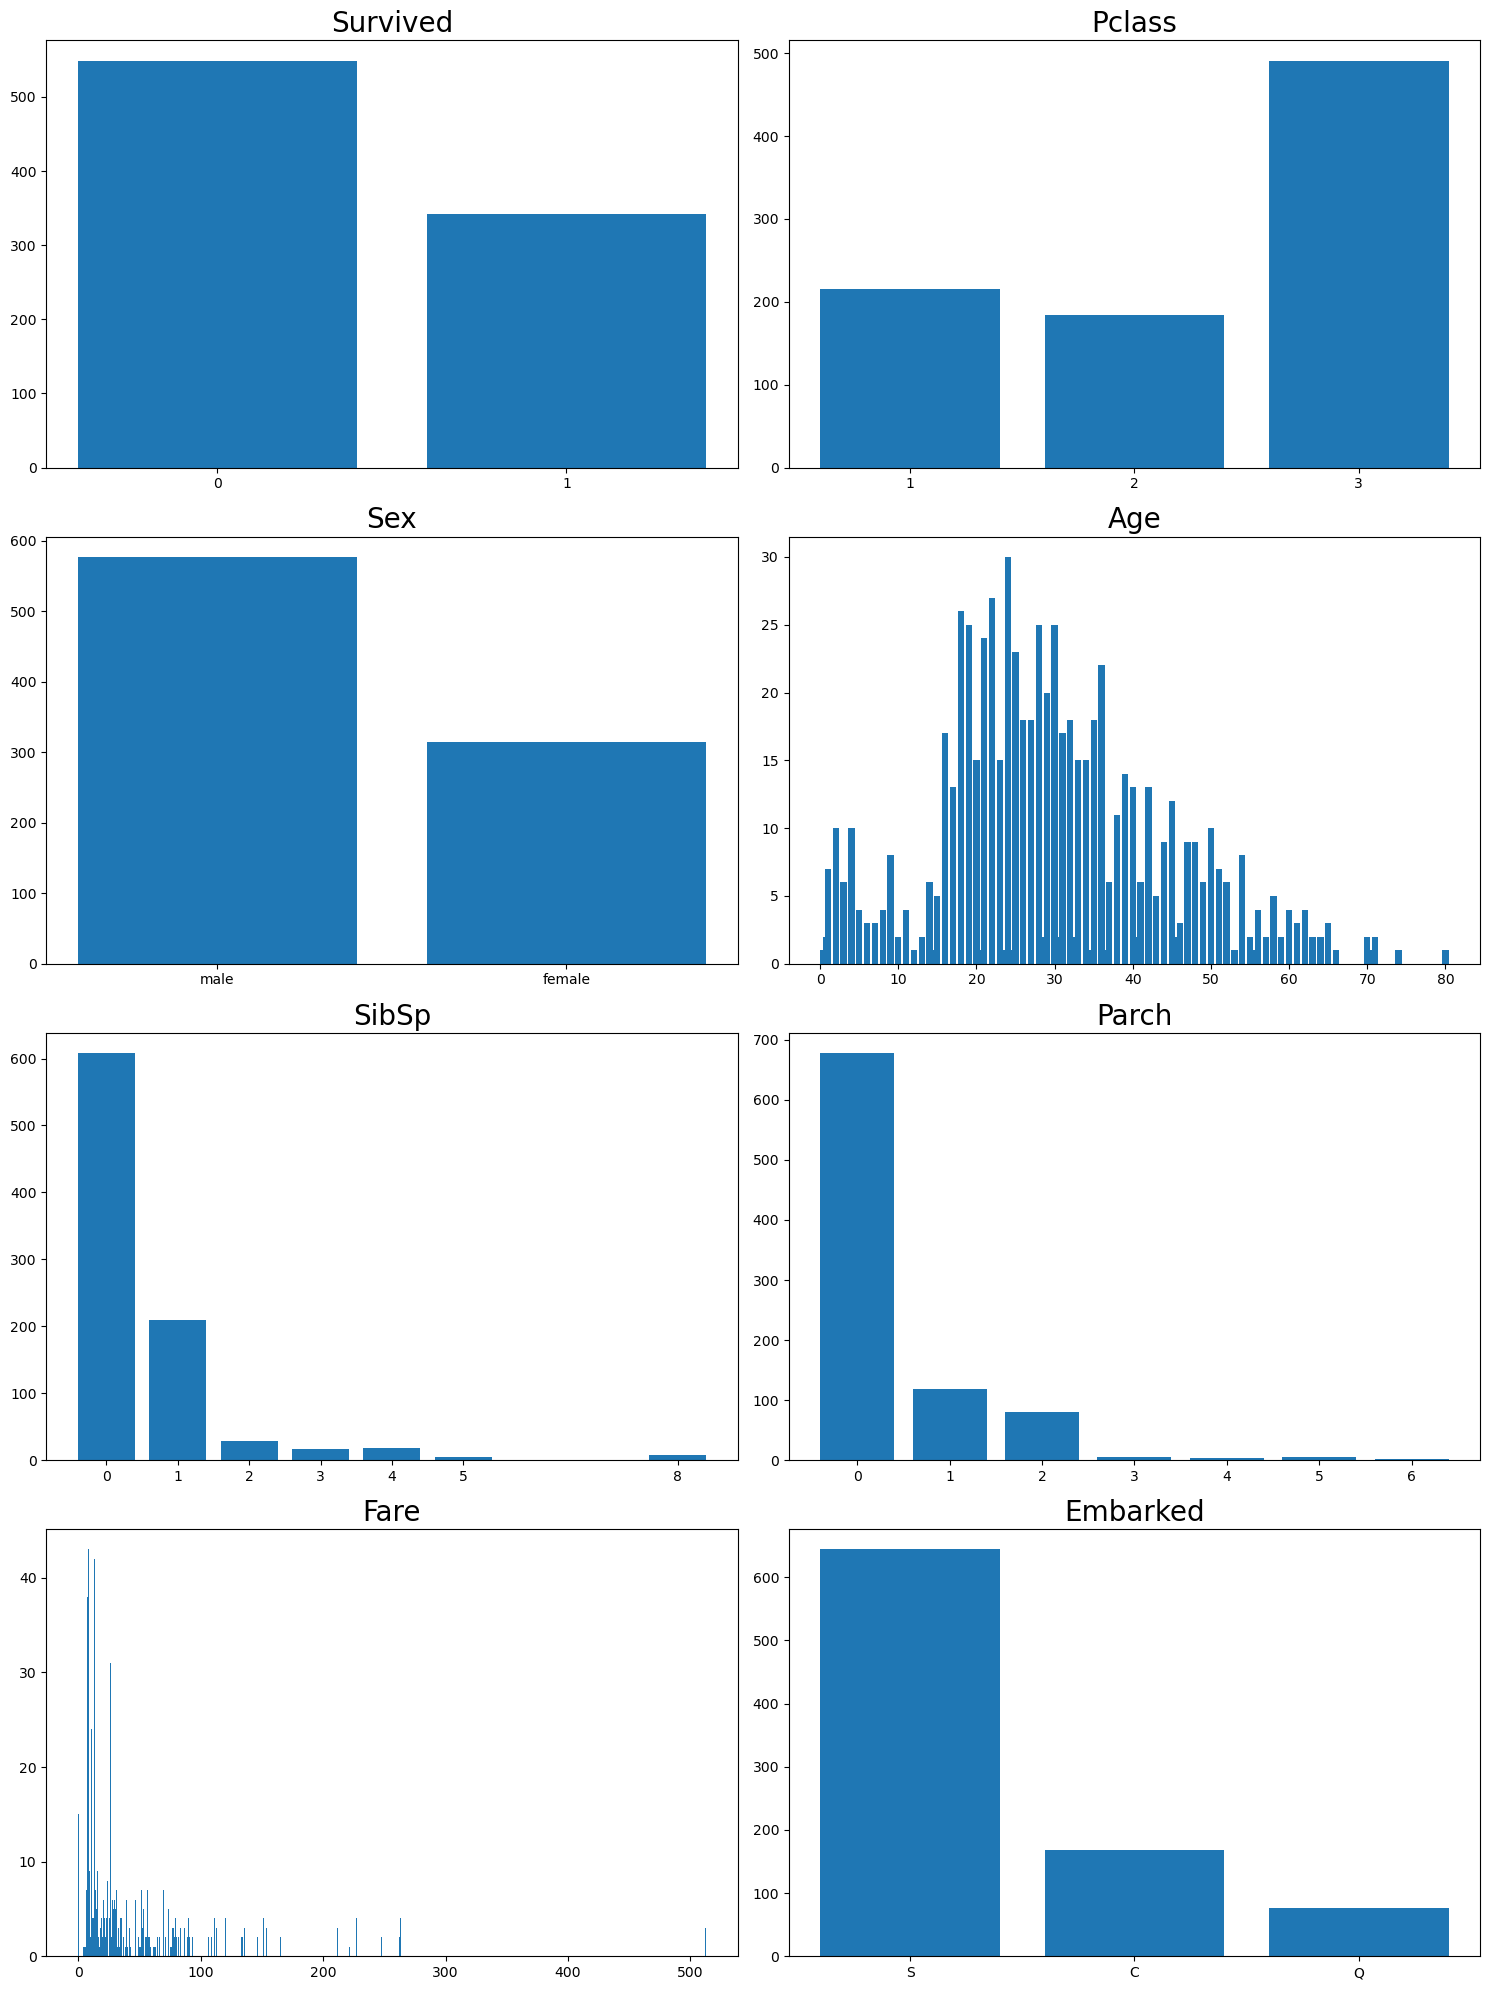

In [150]:
plt.figure(figsize=(15, 20))

m=1

for i in df.loc[:, ~df.columns.isin(["PassengerId", "Name", "Ticket", "Cabin"])]: 
    plt.subplot(4,2, m)
    m+=1
    x=df[i].value_counts()
    
    plt.title(i, fontsize=20)
    
    plt.bar(x.keys(),x)
    if len(x.keys())<=10: 
        plt.xticks(x.keys(),  fontsize=10)
    
plt.tight_layout()
plt.show()


### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

### RESPOSTES APARTAT 2
**Estàn les dades normalitzades? Caldria fer-ho?**
Els únics atribut que no es troba normalitzat és Age i Fare que son atributs numèrics continus que presenten rangs diferents amb els altres atributs. 
Normalitzariem els atributs Age i Fare, què van associats a l’edat i el preu del bitllet dels passatgers.

**En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?**
Degut a l’existència d’outliers que proporcionen informació important per al model de predicció i que mantindrem, optem per la normalització robusta mantenint els outliers sense tenir una influència d’aquests. 

**Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)**
Els únics atributs que tenen nans son: Age, Cabin i Embarked. 
Les 177 dades faltants respecte a l’edat és un número considerable. La falta de dades pot afectar a la precisió del model perquè l’edat és un factor rellevant per a la supervivència. Podriem imputar els valors Nans, per fe-ho pensem en utilitzar un mètode de imputació multivariable ja que si utilitzessim un mes simple com la mitjana d’edat el que fariem es tenir tots els valors Nan a un mateix valor, fent que tinguessim unes dades de l'edat molt desbalancejades. El mètode d’imputació que utilizarem per l’edat serà un KNN. 

Com ja hem dit abans, per a Cabin tenim 687 valors faltants, tot i que la cabina pot relacionar-se indirectament amb la supervivència per la localitat al vaixell la gran falta de dades limita molt la utilitat a l'anàlisi. I tampoc tenim cap dada de com es representa la cabina, es a dir no sabem el valor que ens està dient. Considrem  l’eliminació.  
En quant a Embarked tenim només 2 valors Nans, per tant, podem utilitzar el valor del port on embarcava cada persona per intentar relacionar-ho amb la supervivència. Imputarem els valors Nans a través de la moda degut a que és un atribut categòric.

**Teniu dades categoriques? Quina seria la codificació amb més sentit?** 
Tot i anteriorment mencionar que hi havia 5 atributs categòrics (Sex, Cabin, Embarked, Name, Ticket) després de fer un anàlisi observem que Name era soroll a les dades ja que no ens aportaba informació (tothom té un nom diferent). Per els atres atributs hem: 
<ul>

<li>Sex → al tenir una variable binària podem utilitzar label encoding (0 → home, 1 → dona).</li>
<li>Embarked → Tres categories (C, Q i S) les quals no tenen cap relació, utilitzariem one-hot encoding.</li>
<li>Pclass → Representa classes de servei, utilitzarem one-hot encoding perquè no és una variable ordinal clara. </li>
<li>Cabin → Aquest atribut te una gran proporció de Nans, l’únic que sembla que podem fer es simplificar aquest atribut a “Té cabina” o “No té cabina”, d’aquesta manera tindriem una variable binària i utilitzariem label encoding (0 i 1). Pero al final hem optat per eliminar l’atribut de la nostra base de dades.</li> 
<li>Name i ticket son atributs categòrics que tenen valors que practicament no es repeteixen el que provoca que no puguem extreure informació.</li>
</ul>

**Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?** 
- Name → Possibilitat d’extreure el títol (Mr., Mrs., etc) i utilitzar one-hot encoding així podriem saber el sexe pero com  ja que tenim una categoria que es Sex, no ens interessa.  
- Ticket → Segons si detectem patrons en els números o prefixes dels bitllets. Pero per fer-ho necessitariem saber quin criteri es va utilitzar per posar els noms als tickets i no ho sabem. També veiem que massa tickets tenen valors únics

**Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?** 
PCA s'utilitza comunament quan moltes de les variables estan altament correlacionades entre si i és desitjable reduir el seu nombre a un conjunt independent. 
Per saber o no si aplicar PCA miren si els atributs están correlacionats amb una matriu de correlació. 

La matriu de correlació es mostra en el codi que mostrem a continuació 

Veiem que no hi ha cap correlació per sobre de 0.7 a més que pclass1, pclass2, pclass3 té sentit que estiguin correlacionades degut a que al cap i a la fi provenen del mateix atribut pclass,  el mateix passa amb embarked1,embarked2, i embarked3.
Tenint en compte que les dades no estan correlacionades i que ja tenim un número relativament baix d’atributs hem decidit no fer PCA. 

Els beneficis principals de aplicar  PCA es que obtindrem un conjunt d’elements que no son  independents entre ells, fent que reduïm les dades (eliminant valors redundants). Però sense reduir la informació que té el conjunt. La reducció de variables ens farà que el rendiment del model sigui millor.

Per altre banda  perdrem la interpretabilitat de les dades, ja que els components que ens retorna el PCA son combinacions lineals de les variables originals. PCA només es capaç de trobar relacions lineals entre variables. I encara que mantenim la major part d’infomació, sempre tindrem una pèrdua d’aquesta.

**Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?** 
Com ja hem dit abans, nosaltres mateixos ja hem seleccionat les característiques que creiem més convenients per la falta de valors nans. També hem eliminat diversos atributs que tenien valors únics i per tant no aportaven informació com son ticket i Nom. 

Per la resta de variables que tenim com hem mostrat anteriorment no s’acaba de veure cap correlació clara. La única que pot ser sospitosa es Fare amb PClass, pero decidim mantenir-la 

**Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?**
L'aplicació de PolynomialFeatures té sentit fer-la quan les relacions entre les dades  no son lineals, pero el model que utilitzem si que es lineal, com el cas d’un  regressor logísitic (LogisticRegression). 

Per saber si aplicar o no PolynomialFeatures ens interesa veure si hi ha alguna relació no lineal entre el valor a predir i els atributs, per fer-ho hem utilizat sns.pairplot per a que ens mostri per cada variable com es relaciona amb les altres. 

Si ens fixem en la última columna (la de survived)  no sembla que hi hagi cap correlació no lineal entre atributs. S’ha de dir que al ser survived un valor que pren 0 o 1 nomes es dificil poder trobar una relació no lineal sobretot quan tenim molts altres atributs que tambe agafen valors binaris (0 o 1) com son pclass_1 o embarked_1


### CODI APARTAT 2

Numero de Cabin diferents 147
Numero de Name diferents 891
Numero de Ticket diferents 681
Numero de PassengerId diferents 891
Numero de Cabines no nan 204
    Sex       Age  SibSp  Parch      Fare  Embarked_1  Embarked_2  Embarked_3  \
0     1 -0.335664      1      0 -0.312011         0.0         0.0         1.0   
1     0  0.559441      1      0  2.461242         1.0         0.0         0.0   
2     0 -0.111888      0      0 -0.282777         0.0         0.0         1.0   
3     0  0.391608      1      0  1.673732         0.0         0.0         1.0   
4     1  0.391608      0      0 -0.277363         0.0         0.0         1.0   
5     1 -0.167832      0      0 -0.259680         0.0         1.0         0.0   
6     1  1.454545      0      0  1.620136         0.0         0.0         1.0   
7     1 -1.454545      3      1  0.286744         0.0         0.0         1.0   
8     0 -0.055944      0      2 -0.143827         0.0         0.0         1.0   
9     0 -0.783217      1      0  0.

Text(0.5, 1.0, 'Matriu de correlació')

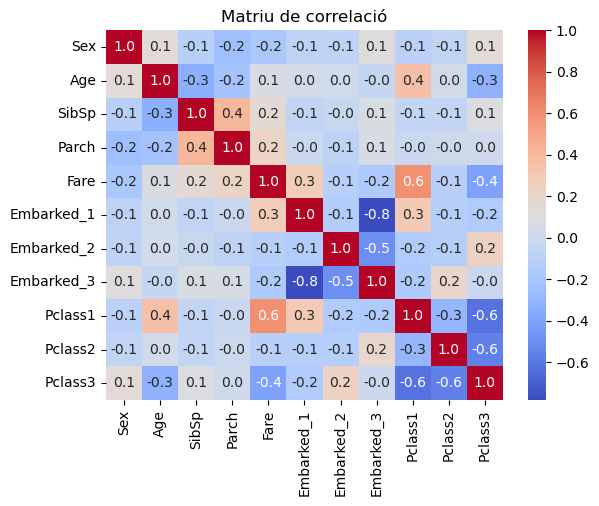

In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# Separar el ground-truth de les mostres
y=df["Survived"]
X=df.drop(columns=["Survived"])

columns_list = ["Cabin", "Name", "Ticket", "PassengerId"]

for col in columns_list:
    print(f"Numero de {col} diferents {len(df[col].value_counts())}")
print(f"Numero de Cabines no nan {df.shape[0]-df.isna().sum()['Cabin']}")

# Drop de columnes Ticket, Name i PassengerId perque totes les mostres tenen un valor diferent
# Drop de Cabin perque la majoria de mostres son NaN i les que no son NaN tenen valors molt diferents
X=X.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"])

#Imputacio dels 2 valors NaNs en Embarked
imputer_embarked = SimpleImputer(strategy='most_frequent')
X["Embarked"] = imputer_embarked.fit_transform(X[['Embarked']]).ravel()

#Normalització de Age i Fare
rs = RobustScaler()
X[["Age", "Fare"]] = rs.fit_transform(X[['Age', 'Fare']])

# Conversió de Sex en home -> 0, dona -> 1
le = LabelEncoder()
le.fit(["female", "male"])
X["Sex"]=le.transform(df["Sex"])

oe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
embarked = oe.fit_transform(X["Embarked"].values.reshape(-1,1))
pclasses = oe.fit_transform(X["Pclass"].values.reshape(-1,1)) 

X=X.drop(columns=["Embarked", "Pclass"])

column_names_embarked = [f'Embarked_{i+1}' for i in range(len(embarked[0]))]
column_names_pclasses = [f'Pclass{i+1}' for i in range(len(pclasses[0]))]
X=pd.concat([X, pd.DataFrame(embarked, columns=column_names_embarked), pd.DataFrame(pclasses, columns=column_names_pclasses)], axis=1)


features_for_imputation = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass1', 'Pclass2', 'Pclass3', 'Sex']

# Aplicar KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = knn_imputer.fit_transform(X[features_for_imputation])

# Tornar a posar els valors imputats en X
X['Age'] = np.where(X['Age'].isna(), data_imputed[:, 0], X['Age'])

print(X.head(20))

#Miro si les dades estan correlacionades o no per saber si aplicar PCA 
correlation_matrix = X.corr()
matrix=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')#per veure la matriu de correlacio
matrix.set_title("Matriu de correlació")
#veiem que no hi ha cap correlació per sobre de 0.7 
#a mes que pclass1, pclass2, pclass3 té sentit que estiguin  correlacionades degut a que al cap i a la fi provenen del mateix atribut pclass, 
# el mateix passa amb embarked1,embarked2, i embarked3

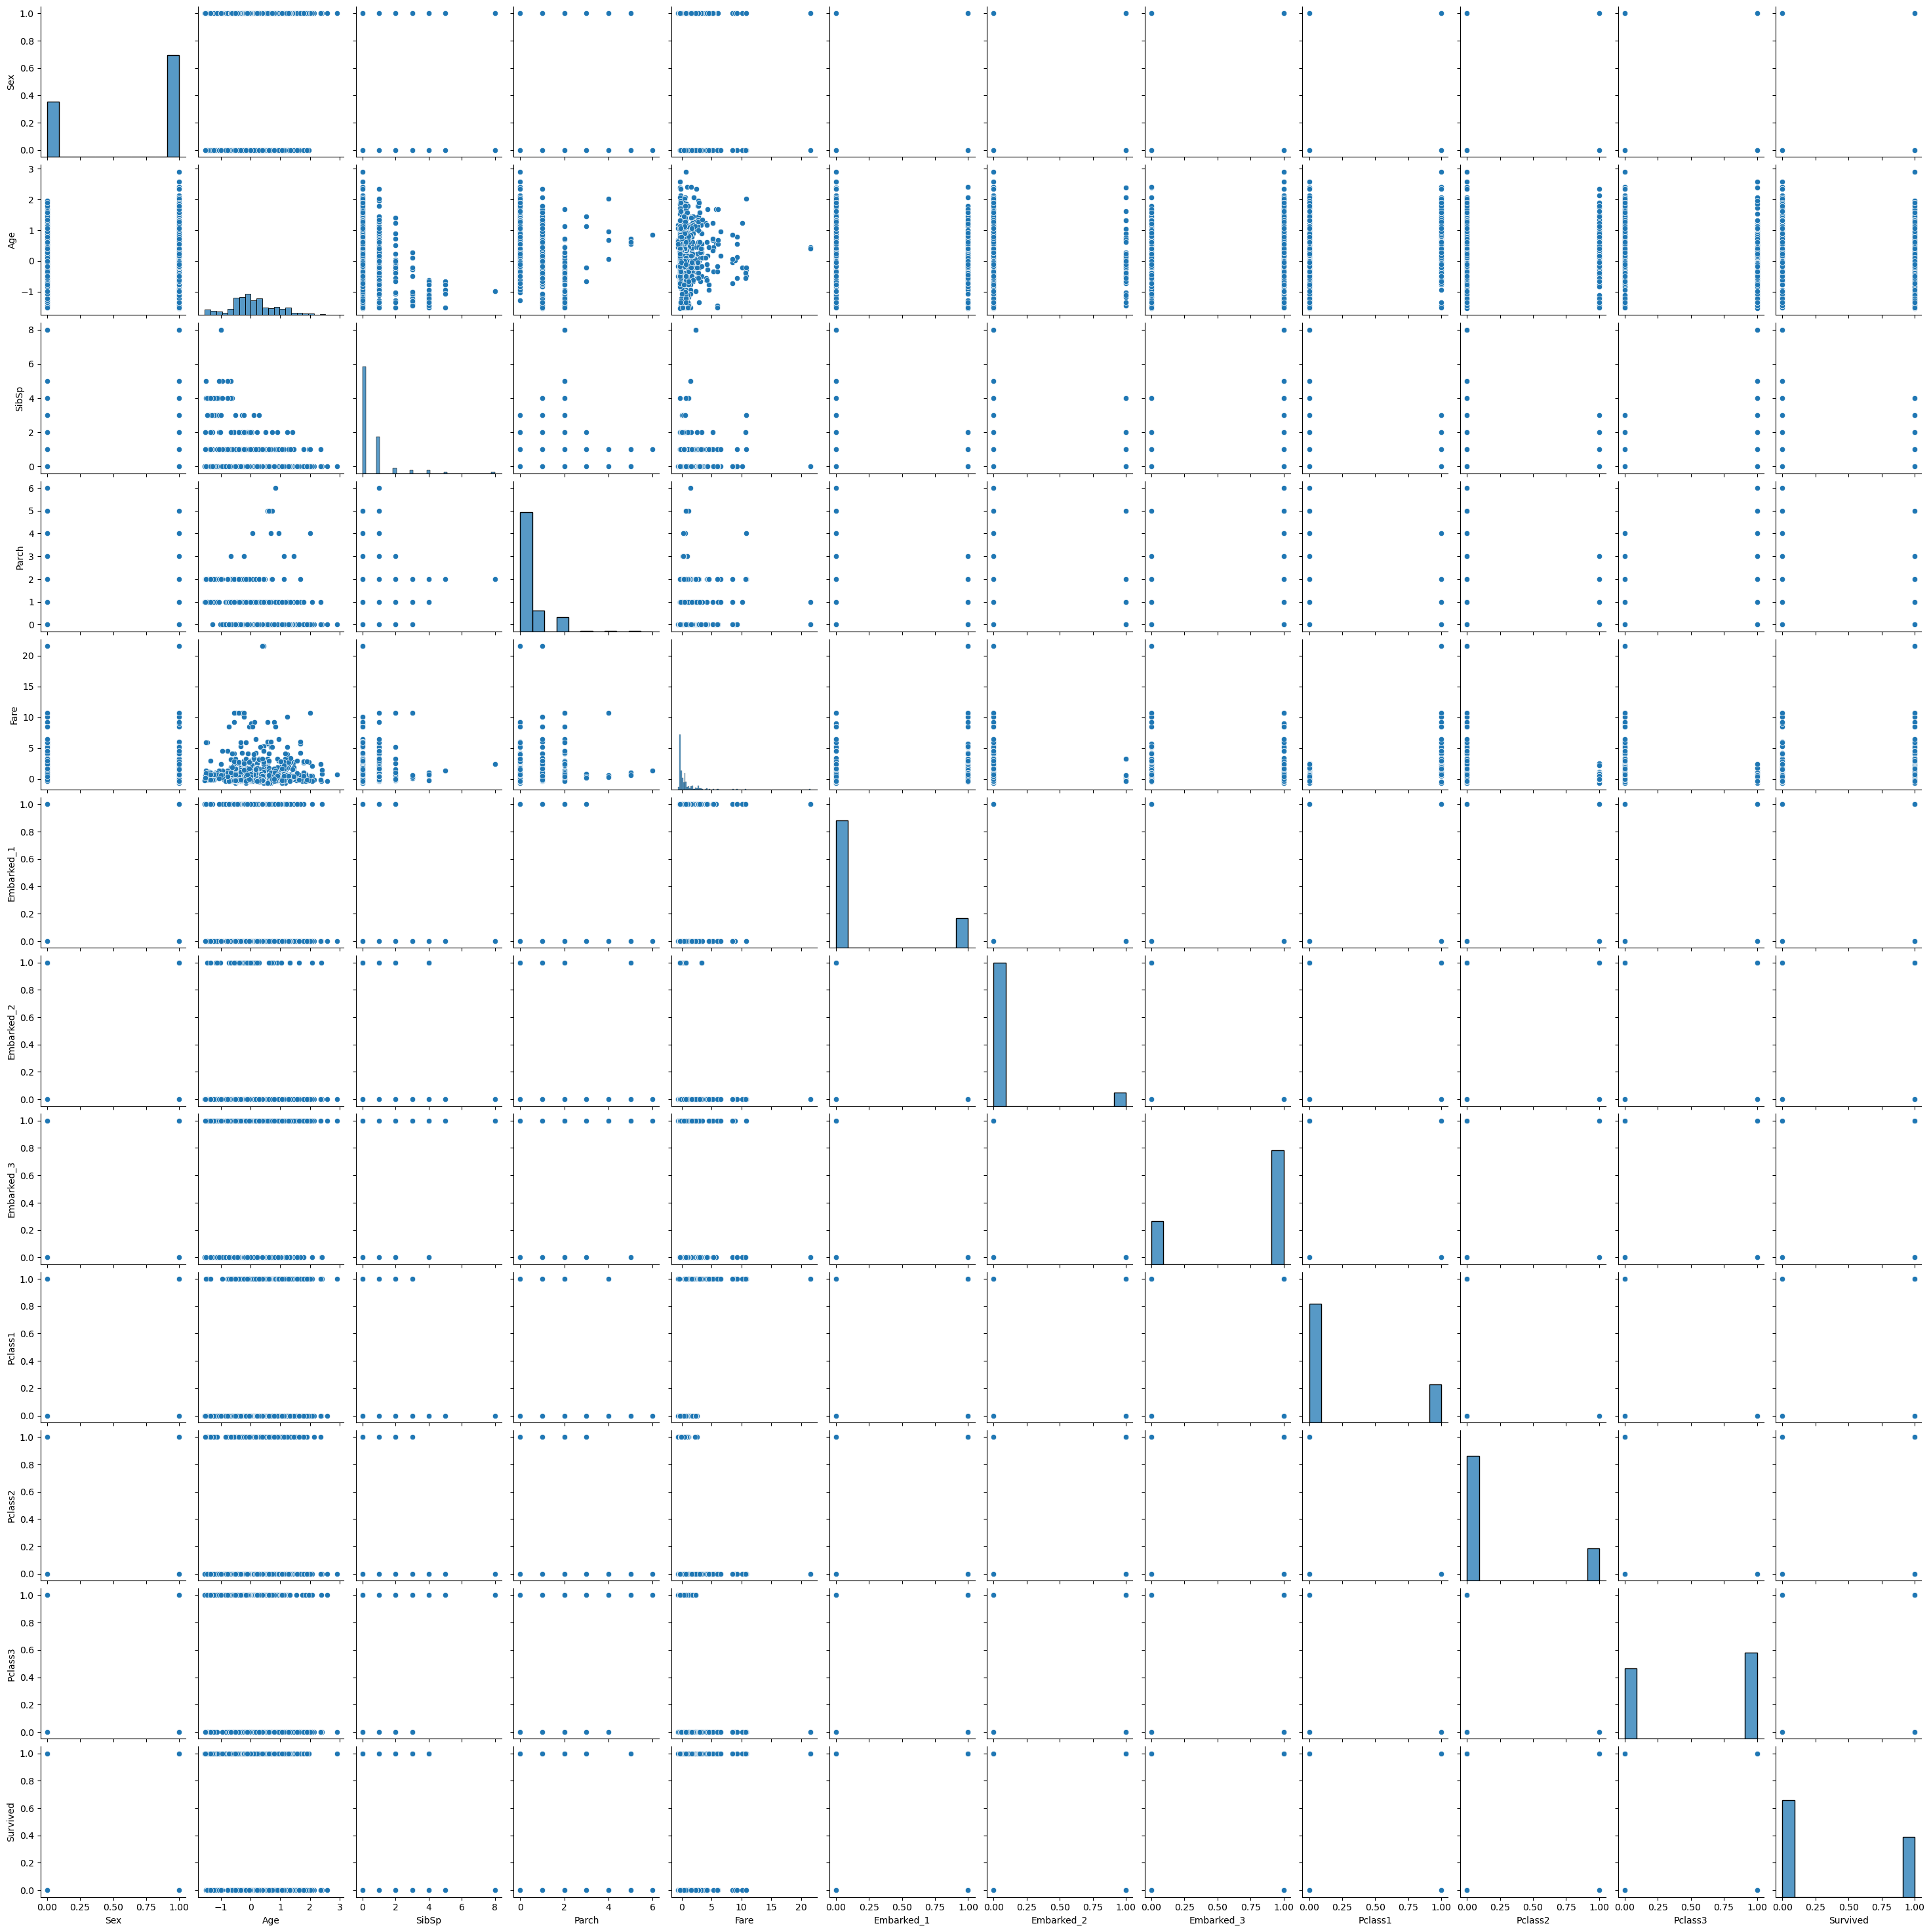

In [152]:

#mostrem grafics per veure si hi ha alguna relació 

df=pd.read_csv("titanic/train.csv")
df=df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"])
sns.pairplot(pd.concat([X,y], axis=1))#hue='Survived') --> si no se quiere ver la columna survived i que salga en color en las otras
#a simple vista veiem que cap variables  tene una relació clara entre si sobreviura o no. L'unic atribut que  mostra alguns valors que podem veure que 
#si es cumpleix no sobreviura es quan l'edat de la persona esta entre 3 i 4 (un cop normalitzades les dades)
plt.show()


### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'unic que es valora es l'eleccio de la metrica de classificacio aixi com saber quin tipus de grafiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la metrica d'error que es fara servir, i es una decisio que cal pendre previa a entrenar models

### RESPOSTES A L'APARTAT 3
**A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?**
accuracy_score: Mesura el percentatge de prediccions correctes, però és menys útil en datasets no balancejats, ja que un alt valor d'accuracy pot ocultar un rendiment molt dolent en la classe minoritària.

f1_score: És la mitjana harmònica entre la precisió (precision) i el recall. Aquesta mètrica és especialment útil quan hi ha un desbalanceig de classes, ja que aconsegueix un bon equilibri entre la capacitat del model de trobar instàncies positives (recall) i la seva precisió en fer-ho. És una bona mètrica en situacions on tant els falsos positius com els falsos negatius són importants, com per exemple en la predicció de la supervivència en el Titanic.

average_precision_score: Aquesta mètrica s'utilitza per avaluar el rendiment dels models de classificació basats en probabilitats, i és especialment adequada en datasets no balancejats. Calcula la precisió mitjana ponderada a través de diversos llindars, donant més importància als llindars on el model fa bones prediccions per a la classe positiva. És una bona mètrica si el focus és optimitzar el rendiment sobre la classe minoritària.

Per a un problema amb dades desequilibrades, com la predicció de la supervivència en el Titanic, el f1_score és una bona opció si es vol equilibrar precisió i recall. No obstant això, si es vol donar més importància a la classe positiva (supervivents), l'average_precision_score podria ser més rellevant. L'accuracy_score no és adequada en aquest cas.


**Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)**

La corba ROC Representa la relació entre el True Positive Rate (TPR) (també anomenat recall) i el False Positive Rate (FPR) (la proporció de negatius incorrectament classificats com a positius). Aquesta corba pot ser menys informativa en datasets desequilibrats perquè, en aquests casos, el nombre de negatius és molt més gran que el de positius, i un model pot tenir un FPR molt baix simplement perquè està tractant molts més negatius, mentre que la corba Precisió-Recall mostra la relació entre la precisió (la proporció de prediccions correctes per a la classe positiva) i el recall (quins dels exemples positius són identificats correctament). Aquesta corba és més rellevant en datasets desequilibrats, ja que posa més èmfasi en la classe positiva, que en el nostre cas és la classe d'interès (els supervivents).

Com hem dit abans el nostre cas es tracta en datasets desequilibrats, en el cas del Titanic, el dataset està desequilibrat perquè hi ha més passatgers que van morir (classe negativa) que passatgers que van sobreviure (classe positiva). Això fa que la corba de Precisió-Recall sigui més adequada per avaluar el rendiment del model, ja que ens centra en com el model està tractant la classe que ens interessa més: els supervivents (classe positiva).

Grafics resultants a les respostes d'aquest apartat.


**Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?**

El mètode classification_report mostra les mètriques clau per a cada classe en un problema de classificació:
    <ol>
    <li>Precisión: Proporció de prediccions correctes sobre el total de prediccions fetes (com d'exactes són les prediccions positives).</li>
    <li>Exhaustivitat (Recall): Proporció d'elements positius correctament identificats pel model (com de bé es detecten els casos positius).</li>
    <li>F1-score: Combinació de precisió i exhaustivitat, útil per equilibrar ambdues.</li>
    <li>Support: El nombre d'exemples reals en cada classe.</li>
    </ol>
**Quina mètrica hauriem de seguir?**    
    <ol>
    <li>Per evitar falsos positius, ens fixarem en la precisió.</li>
    <li>En el cas de voler detectar tots els casos positius (evitar falsos negatius), la exhaustivitat és més important.</li>
    <li>F1-score és útil quan les classes estan desbalancejades o necessites un bon equilibri entre precisió i exhaustivitat.</li>
    </ol>
El nostre dataset està desequilibrat, ja que hi ha més morts que supervivents al Titanic, per aquest motiu la mètrica més adequada és el F1-score. Aconseguim un bon equilibri entre precisió (proporció de prediccions correctes de la classe positiva) i el recall (quants exemples positius són identificats correctament), fent-la molt útil quan hi ha un desbalanceig de classes. Ens ajudarà a assegurar que el model identifica bé els supervivents sense perdre precisió ni sobrevalorar els negatius (no supervivents).


### CODI APARTAT 3

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, classification_report, roc_curve
from sklearn.model_selection import train_test_split

In [154]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(model, params, x_train, y_train, folds=10, score="f1"):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=folds, n_jobs=-1, verbose = 4, scoring=score)
    grid_search.fit(x_train, y_train)

    print(f"Mejores hiperparámetros: {grid_search.best_params_}")

    return [grid_search.best_estimator_, grid_search.best_score_]

In [155]:
def show_pr_curve(model, x, y, classifier_name):

    # predict probabilities
    y_prob = model.predict_proba(x)

    # keep probabilities for the positive outcome only
    y_prob = y_prob[:, 1]

    precision, recall, _ = precision_recall_curve(y, y_prob)

    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color='b', lw=2, label='PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {classifier_name}')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

In [156]:
from sklearn.metrics import average_precision_score
def show_performance(x, y, model, title='', average='binary', show = True):

    predictions = model.predict(x)
    cr=classification_report(y, predictions, output_dict=True)
    prec=cr['weighted avg']["precision"]#utilitzem la precissio i el recall  pero amb weighted avg que ens dona la mitja ponderada de precission i recall per cada classe 
    rec=cr['weighted avg']["recall"]
    f1=cr['weighted avg']["f1-score"]
    
    conf_mat = confusion_matrix(y, predictions)

    # Per PR Curve, necessitem les probabilitats de cada classe:
    probs = model.predict_proba(x)

    probs = probs[:, 1]
    ap = average_precision_score(y, probs)

    model_ap = round(ap, 3).item()
    f1=round(f1,3)
    prec=round(prec, 3)
    rec=round(rec, 3)
    performance_dict = {

        'model_name': title,
        'model_f1': f1,
        'model_prec': prec,
        'model_rec': rec,
        'model_ap': model_ap
    }

    if show:
        print('-' * 25)
        print('>>> Rendiment del model:')
        print(f'- F1-score: {f1}')
        print(f'- Precision: {prec}')
        print(f'- Recall (Sensitivity, TPR): {rec}')
        print(f'- Average precision score: {model_ap}')
        print('-' * 25)

        disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
        disp.plot()
        plt.title(f'{title} Conf. Mat.')
        plt.show()

    return performance_dict

In [157]:
def show_roc_curve_binary(model, x, y, classifier_name):

    # generate a no skill prediction (majority class)
    ns_probs = [1 for _ in range(len(y))]

    # predict probabilities
    probs = model.predict_proba(x)

    # keep probabilities for the positive outcome only
    probs = probs[:, 1]

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
    fpr, tpr, threshold = roc_curve(y, probs)

    # Plot stuff:
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
    plt.plot(fpr, tpr, marker='.', label=classifier_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Corba ROC')
    plt.legend()
    plt.show()

In [158]:
def compare_metrics(list_of_models_metrics):

    models_name = []
    models_f1 = []
    models_prec = []
    models_rec = []
    models_ap = []

    for mm in list_of_models_metrics:
        models_name.append(mm['model_name'])
        models_f1.append(mm['model_f1'])
        models_prec.append(mm['model_prec'])
        models_rec.append(mm['model_rec'])
        models_ap.append(mm['model_ap'])

    # Create a DataFrame to hold all the metrics
    data = pd.DataFrame({
        'Model': models_name,
        'F1-score (weighted avg.)': models_f1,
        'Precision (weighted avg.)': models_prec,
        'Recall (weighted avg.)': models_rec,
        'Average precision score': models_ap
    })

    # Reshape the DataFrame using melt for easier plotting
    data_melted = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')

    # Create the bar plot
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette='crest')

    # Add text labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

    # Add title and labels
    plt.title(f'Comparison of F1-score, Precision, Recall, and Average precision score')
    plt.ylabel('Score')
    plt.xlabel('Models')
    plt.ylim(0.4, 1.0)

    # Display the plot
    plt.show()

### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


### RESPOSTES APARTAT 4
**Quins models heu considerat? Perque els heu seleccionat?**
Hem considerat els seguents models:
<ul>
    <li>SVC: SVM és potent per a problemes de classificació amb marges grans entre classes i es comporta bé en espais multidimensionals.</li>
    <li>Arbre de Decisió: Model simple  de classificació que es basa en elegir el millor guany d'informació a cada vertex del arbre, funciona bé per característiques categòriques i numèriques sense preprocessament extens.</li>
    <li>Regressió Logística: És un model bàsic per a problemes de classificació binària. Funciona bé amb variables numèriques i categòriques, i ens permet entendre com influeix cada atribut en la probabilitat de supervivència. Es basa en la funció sigmoidea i en el descens de gradient per mesurar la influencia de cada atribut en la predicció</li>
    <li>KNN (K-Nearest Neighbors): És simple i efectiu per a conjunts de dades amb baixa dimensionalitat, on classifiquem segons si hem vist previament dades similars.</li>
    <li>Random Forest: Combina múltiples arbres per millorar la precisió i reduir el sobreajustament en comparació amb els arbres de decisió simples. Aplica bagging i un vector d'entrada aleatori per elegir l'atribut el qual fer la divisió en cada instancia.</li>
    <li>AdaBoost amb Arbre de Decisió: Millora el rendiment de models dèbils mitjançant l’ajust iteratiu, donant més pes a les dades que havia classificat malament i es torna a entrenar un nou model, per fer la predicció es tenen en compte tots els models que s'han entrenat.És una tècnica robusta per millorar la precisió en dades complexes.</li>
    <li>Stacking: Ens permet que la entrada de un model sigui la sortida de models anteriors</li>
</ul>

**Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?**
Per seleccionar el millor model, es va utilitzar Stratified K-Fold amb 10 particions per mantenir la proporció de classes i reduir la variabilitat en l’avaluació del model.
Importància de la validació creuada: permet avaluar el rendiment d'un model en diverses particions, fent una mitjana dels resultats, cosa que ajuda a generalitzar el model i reduir el risc de sobreajustament, a més ens permet no haver de tenir unes dades exclusivament per la validació.
Validació creuada estratificada: és important en problemes de classificació desequilibrada, ja que garanteix que cada partició mantingui la distribució de classes, millorant així la representativitat de les dades.

**Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?**

Hiperparàmetres seleccionats:
    <ol>
    <li>SVC: C, kernel.
        <ul>
            <li>C → Paràmetre de regularització: 0.1 , 0.5, 1 , 3 ,5</li>
            <li>kernel → Funció del nucli: linear, poly, rbf, sigmoid </li>
        </ul>
    </li>
    <li>Arbre de Decisió: criterion, max_depth, min_samples_split.
        <ul>
            <li>Criterion → Gini entropy </li>
            <li>Max_depth → 3, 5, 8, 12</li>
            <li>min_samples_split → 2,4,8 </li>
        </ul>
    </li>
    <li>Regressió Logística: penalty, C, class_weight, solver.</li>
            <ul>
            <li>penalty → l1,l2, None </li>
            <li>C → 0.01 , 0.1 , 1 , 5, 10</li>
            <li>class_weight → balanced, None</li>
            <li>solver → liblinear, lbfgs</li>
        </ul>
    </li>
    <li>KNN: n_neighbors, weights, p.</li>
        <ul>
        <li>n_neighbors → 3, 5, 7, 9, 11</li> 
        <li>weights → uniform, distance</li> 
        <li>p → 1, 2</li> 
        </ul> 
    </li>
    <li>Random Forest: n_estimators, min_samples_split, criterion, max_features, max_depth.
    <ul>
        <li>n_estimators → 50, 100, 150</li> 
        <li>min_samples_split → 5, 10, 20</li> 
        <li>criterion → gini, entropy</li> 
        <li>max_features → 0.1, 0.2, 0.3</li> 
     </ul>
    <li>AdaBoost: n_estimators, learning_rate. 
        <ul> 
            <li>n_estimators → 30, 40, 50, 60, 70, 80</li> 
            <li>learning_rate → 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4</li>
        </ul> 
    </li> 
    </ol>


Descartar models: Es podria descartar KNN en conjunts de dades grans o amb moltes dimensions, ja que aquest model pot esdevenir computacionalment costós. A més, KNN tendeix a ser més sensible al soroll i no gestiona tan bé problemes amb moltes característiques com els models en ensemble (per exemple, Random Forest), això provoca que no mirem al KNN un valor de K molt petit ja que podria provocar agafar soroll. ni massa gran perquè canviariem de classe de classificació.

També podem descartar si utilitzar la funció de decisió tipo 1vs1 o 1vsRest en SVC degut a que només tenim dos valors en la predicció.

**Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.**

Anem mostrant les gráfiques a mesura que es fa el hyperparameter tuning i es mostra la taula dels resultats al final.

**Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?**

Hem utilitzat Stratified K-Fold tant en la selecció de model com en la selecció de hiperparàmetres amb una k=10. Stratified K-Fold és una variant del K-fold que assegura que cada fold manté la mateixa proporció de classes que el conjunt de dades original. Això és especialment útil en problemes de classificació on hi ha classes desbalancejades, com és el nostre cas.
Modificar el número de k el que fa és que si tenim una k baixa el model a l'entrenar-se utilitzi pràcticament les mateixes dades. Si es porta a l'extrem seria one-leave-out, només una mostra per validació i les altres per entrenament.

Per altra banda una k gran provoca que es facin models on les dades d'entrenament poden ser molt diferents i on s'utilitza moltes dades per avaluar.


**Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?**

Hem trobat les seguents formes per cercar hiperparàmetres:
    <ul>
    <li>Grid Search: explora totes les combinacions possibles dels valors pasats, garanteix el millor resultat, però és més costós.</li>
    <li>Random Search: Agafa combinacions aleatories dels valors dels atributs, és menys costós i més ràpid.</li>
    </ul>
Estratègia seleccionada: Per obtenir els millors resultats possibles, vam seleccionar Grid Search amb un conjunt de paràmetres que creiem que era bo i aportaria bons resultats.

**Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?**

Mètode recomanat: En entorns de recursos limitats, Random Forest i Regressió Logística solen ser adequats, ja que Random Forest es pot limitar el numero de arbres implicant també el seu temps, sense acabar de ser un model masa simple, mentre que Regressió Logística és ràpida i efectiva si el problema és principalment lineal.

*Encara que tots els models utilitzats ens han tardat molt menys d'una hora ne ser utilitzats. S'ha de tenir en compte que amb més dades d'entrenament, més temps es tardarien amb tots els models propossats.

Cerca d’hiperparàmetres: Random Search és preferible quan el temps és limitat, ja que permet explorar una bona quantitat de combinacions d’hiperparàmetres sense haver d'explorar-los tots.

**Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?**

Sí, existeixen mètodes avançats com la cerca Bayesiana que utilitza eines com scikit-optimize. Aquest mètode utilitza models probabilístics per ajustar els hiperparàmetres, cercant les combinacions amb millor rendiment en cada iteració, cosa que estalvia temps i recursos en comparació amb Grid Search i Random Search.


### CODI APARTAT 4

In [159]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [160]:
models = {
    'SVC': SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),  
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    "AdaBoostDecisionTree": AdaBoostClassifier(DecisionTreeClassifier(), algorithm='SAMME', random_state=10)
}

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores  = {}

for model_name, model in models.items():
    
    scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='f1')
    cv_scores[model_name] = np.mean(scores)

    print(f'{model_name}: F1-score promedio = {np.mean(scores):.3f}')

best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]

print(f'\nEl mejor modelo es: {best_model_name} con un f1-score promedio de {cv_scores[best_model_name]:.3f}')

SVC: F1-score promedio = 0.730
DecisionTree: F1-score promedio = 0.703
LogisticRegression: F1-score promedio = 0.718
KNN: F1-score promedio = 0.716
RandomForest: F1-score promedio = 0.746
AdaBoostDecisionTree: F1-score promedio = 0.719

El mejor modelo es: RandomForest con un f1-score promedio de 0.746


In [161]:
results = []

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Mejores hiperparámetros: {'C': 3, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}
-------------------------
>>> Rendiment del model:
- F1-score: 0.834
- Precision: 0.84
- Recall (Sensitivity, TPR): 0.838
- Average precision score: 0.851
-------------------------


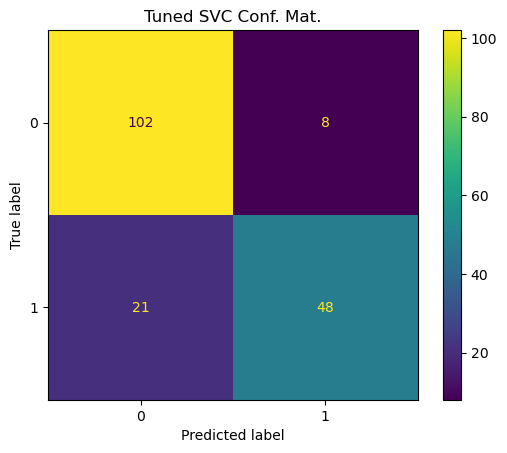

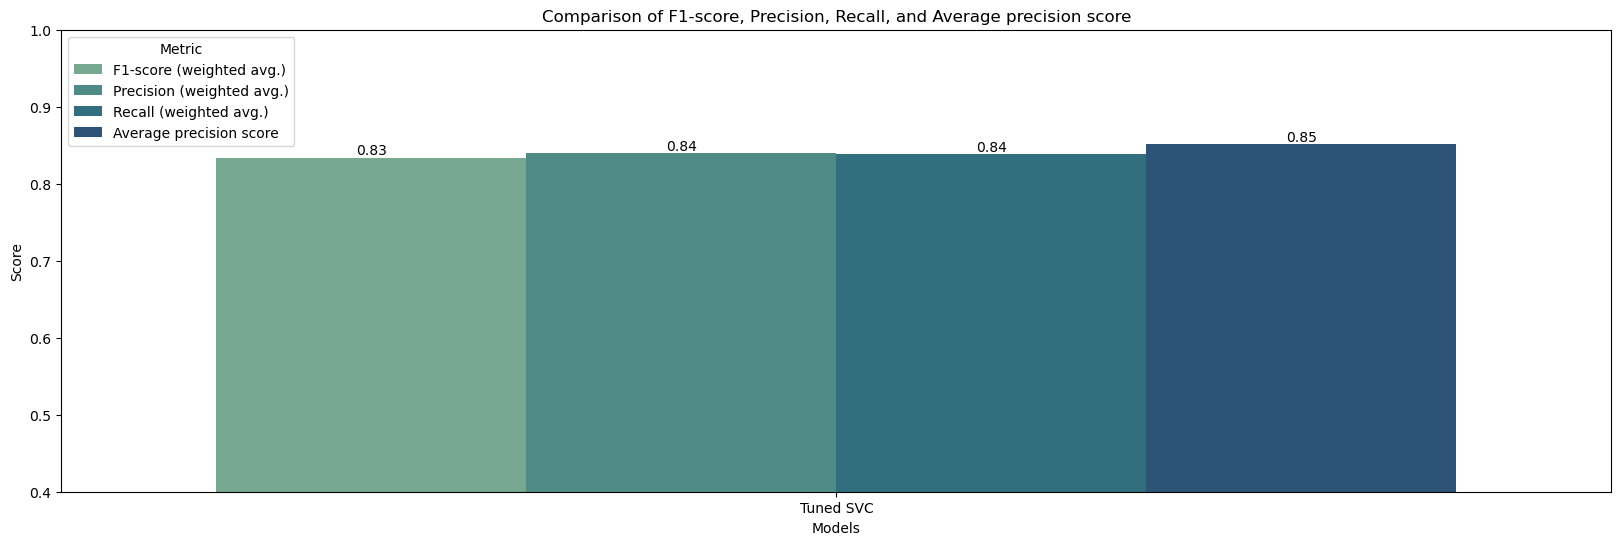

In [162]:
param_grid_svc = dict(kernel = ['linear', 'poly', 'rbf', 'sigmoid'], C=[0.1 , 0.5 , 1 , 3, 5],  decision_function_shape = ['ovo', 'ovr'])

svc = SVC(probability= True, random_state=10)

tuned_svc, best_f1 = hyperparameter_tuning(svc, param_grid_svc, X_train, y_train, folds=stratified_kfold)

svc_metrics = show_performance(X_test, y_test, tuned_svc, title='Tuned SVC', average='binary')

svc_metrics_train = show_performance(X_train, y_train, tuned_svc, title='Tuned SVC', average='binary', show=False)

results.append({
    'Modelo': svc_metrics['model_name'],
    'Hyperparameters Tuned': list(param_grid_svc),
    'Train best F1-score (avg)': svc_metrics_train['model_f1'],
    'Train Precision (avg)': svc_metrics_train['model_prec'],
    'Train Recall (avg)': svc_metrics_train['model_rec'],
    'Test F1-score (avg)': svc_metrics['model_f1'],
    'Test Precision (avg)': svc_metrics['model_prec'],
    'Test Recall (avg)': svc_metrics['model_rec'],
})

compare_metrics([svc_metrics])


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 8}
-------------------------
>>> Rendiment del model:
- F1-score: 0.804
- Precision: 0.813
- Recall (Sensitivity, TPR): 0.81
- Average precision score: 0.757
-------------------------


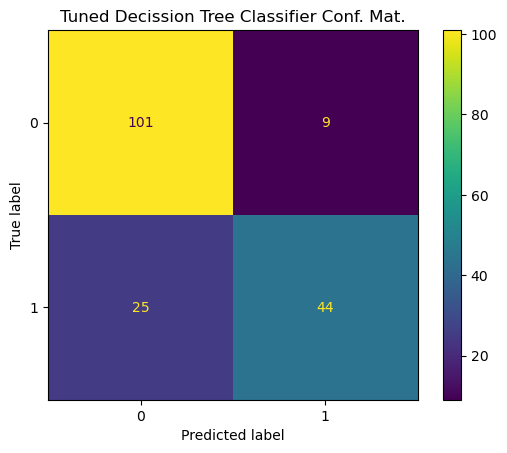

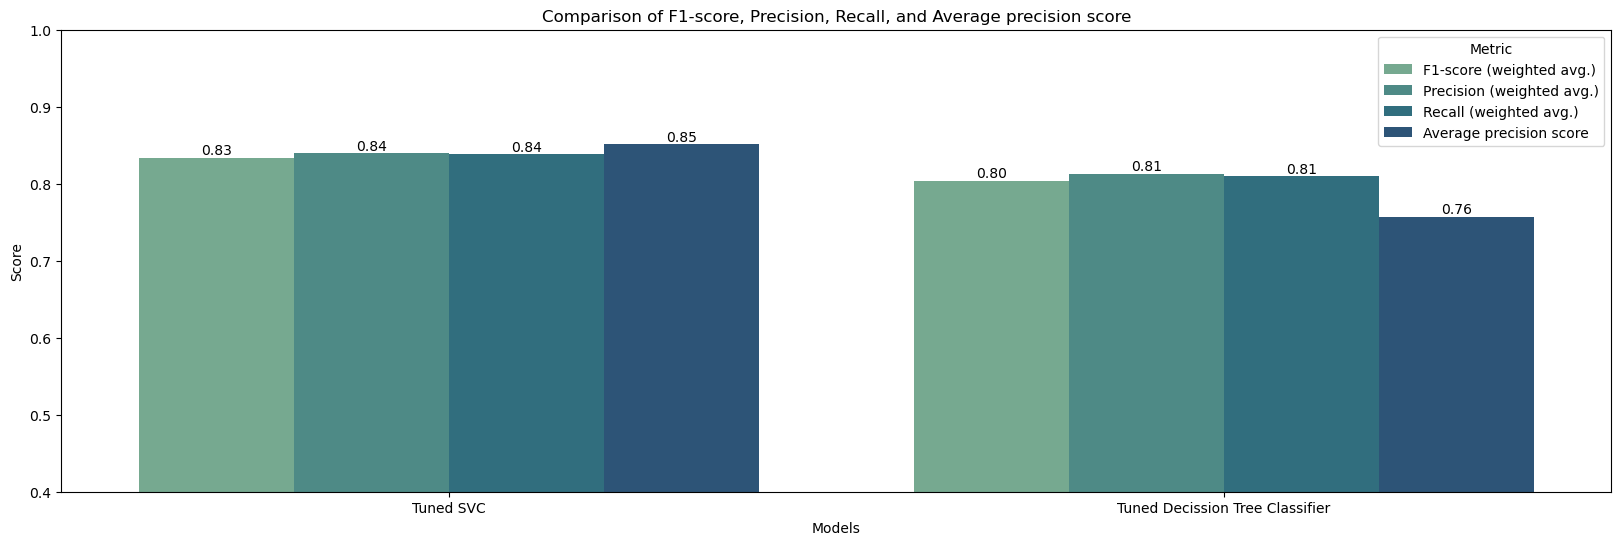

In [163]:
dt=DecisionTreeClassifier()
param_grid_dt=dict(criterion=["gini", "entropy"],  max_depth=[3, 5, 8, 12], min_samples_split=[2, 4, 8])
tuned_dt, best_f1 = hyperparameter_tuning(dt, param_grid_dt, X_train, y_train, folds=stratified_kfold)
dt_metrics=show_performance(X_test, y_test, tuned_dt, title='Tuned Decission Tree Classifier', average='binary')

dt_metrics_train = show_performance(X_train, y_train, tuned_dt, title='Tuned Decission Tree Classifier', average='binary', show=False)

results.append({
    'Modelo': dt_metrics['model_name'],
    'Hyperparameters Tuned': list(param_grid_dt),
    'Train best F1-score (avg)': dt_metrics_train['model_f1'],
    'Train Precision (avg)': dt_metrics_train['model_prec'],
    'Train Recall (avg)': dt_metrics_train['model_rec'],
    'Test F1-score (avg)': dt_metrics['model_f1'],
    'Test Precision (avg)': dt_metrics['model_prec'],
    'Test Recall (avg)': dt_metrics['model_rec'],
})

compare_metrics([svc_metrics, dt_metrics])

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores hiperparámetros: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores hiperparámetros: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
-------------------------
>>> Rendiment del model:
- F1-score: 0.828
- Precision: 0.83
- Recall (Sensitivity, TPR): 0.827
- Average precision score: 0.872
-------------------------


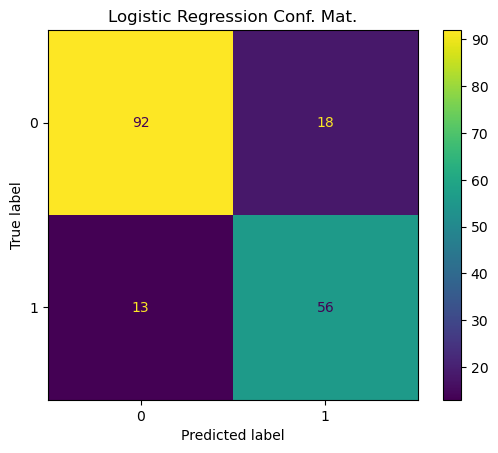

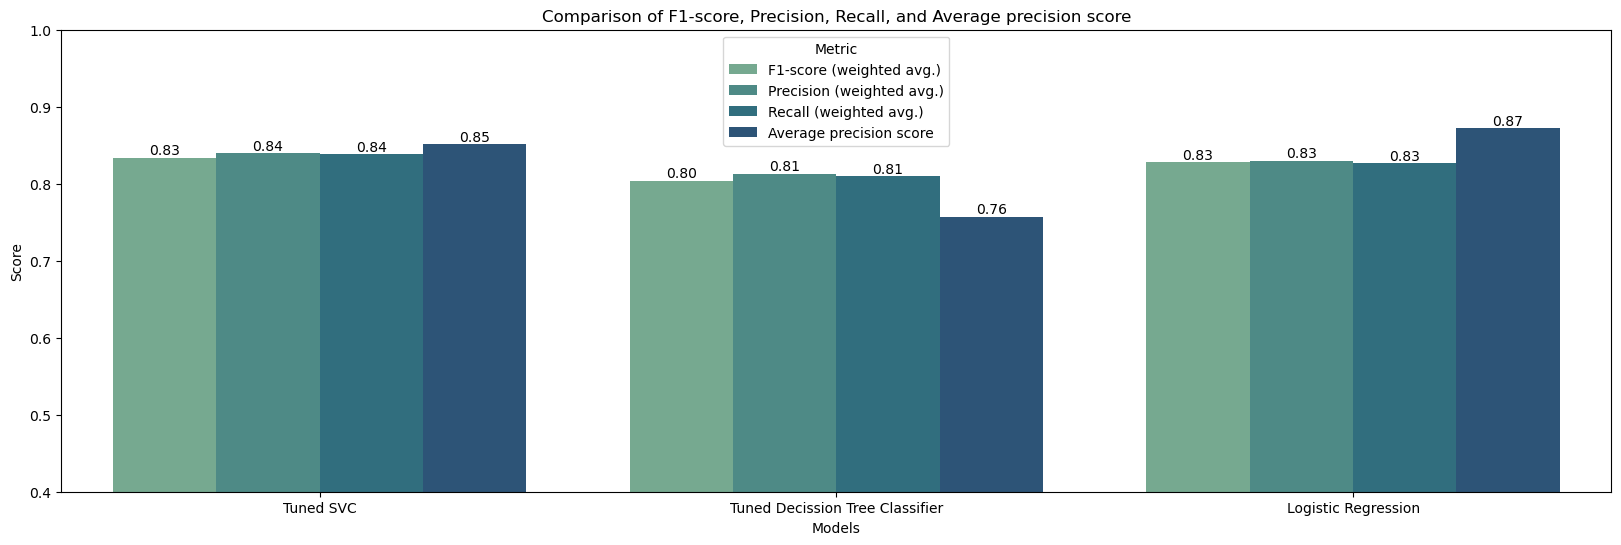

In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

definitive_lr_params = None
definitive_metric = None

params1=dict(penalty=["l1", "l2"], C=[0.01, 0.1, 1, 5, 10], class_weight=["balanced", None], solver=["liblinear"])
tuned_aux, metric1=hyperparameter_tuning(lr, params1, X_train, y_train, folds=stratified_kfold)

params2=dict(penalty=["l2", None], C=[0.01, 0.1, 1, 5, 10], class_weight=["balanced", None], solver=["lbfgs"])
tuned_lr, metric2=hyperparameter_tuning(lr, params2, X_train, y_train, folds=stratified_kfold)

if(metric1 > metric2):
    tuned_lr=tuned_aux
    definitive_metric = metric1
else:
    definitive_metric = metric2

lr_metrics= show_performance(X_test, y_test, tuned_lr, title='Logistic Regression', average='binary')

lr_metrics_train = show_performance(X_train, y_train, tuned_lr, title='Logistic Regression', average='binary', show=False)

results.append({
    'Modelo': lr_metrics['model_name'],
    'Hyperparameters Tuned': list(params1),
    'Train best F1-score (avg)': lr_metrics_train['model_f1'],
    'Train Precision (avg)': lr_metrics_train['model_prec'],
    'Train Recall (avg)': lr_metrics_train['model_rec'],
    'Test F1-score (avg)': lr_metrics['model_f1'],
    'Test Precision (avg)': lr_metrics['model_prec'],
    'Test Recall (avg)': lr_metrics['model_rec'],
})

compare_metrics([svc_metrics, dt_metrics, lr_metrics])

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores hiperparámetros: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
-------------------------
>>> Rendiment del model:
- F1-score: 0.838
- Precision: 0.838
- Recall (Sensitivity, TPR): 0.838
- Average precision score: 0.777
-------------------------


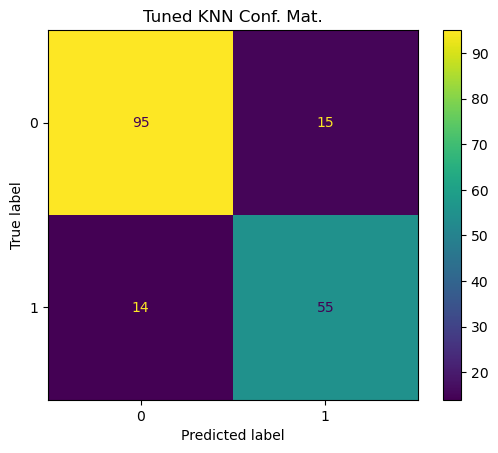

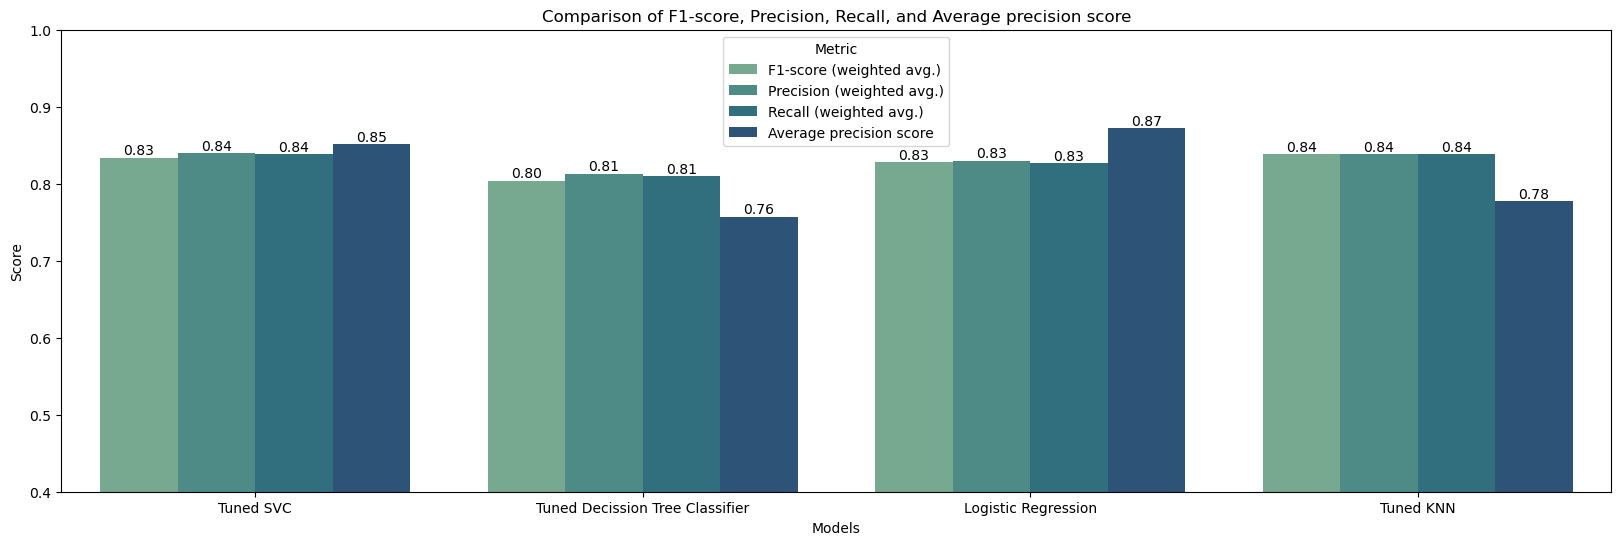

In [165]:
param_grid_knn = dict(n_neighbors=list(range(3, 13, 2)), weights=['uniform', 'distance'], p=[1,2])
knn = KNeighborsClassifier()

tuned_knn, best_f1 = hyperparameter_tuning(knn, param_grid_knn, X_train, y_train, folds=stratified_kfold)

knn_metrics = show_performance(X_test, y_test, tuned_knn, title='Tuned KNN', average='binary')

knn_metrics_train = show_performance(X_train, y_train, tuned_knn, title='Tuned KNN', average='binary', show=False)

results.append({
    'Modelo': knn_metrics['model_name'],
    'Hyperparameters Tuned': list(param_grid_knn),
    'Train best F1-score (avg)': knn_metrics_train['model_f1'],
    'Train Precision (avg)': knn_metrics_train['model_prec'],
    'Train Recall (avg)': knn_metrics_train['model_rec'],
    'Test F1-score (avg)': knn_metrics['model_f1'],
    'Test Precision (avg)': knn_metrics['model_prec'],
    'Test Recall (avg)': knn_metrics['model_rec'],
})

compare_metrics([svc_metrics, dt_metrics, lr_metrics, knn_metrics])


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 12, 'max_features': 0.3, 'min_samples_split': 5, 'n_estimators': 150}
-------------------------
>>> Rendiment del model:
- F1-score: 0.84
- Precision: 0.845
- Recall (Sensitivity, TPR): 0.844
- Average precision score: 0.894
-------------------------


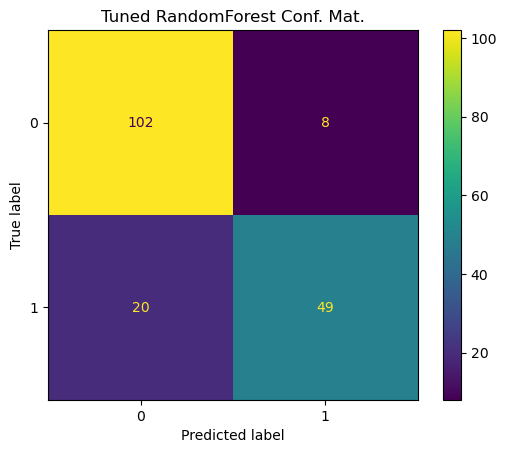

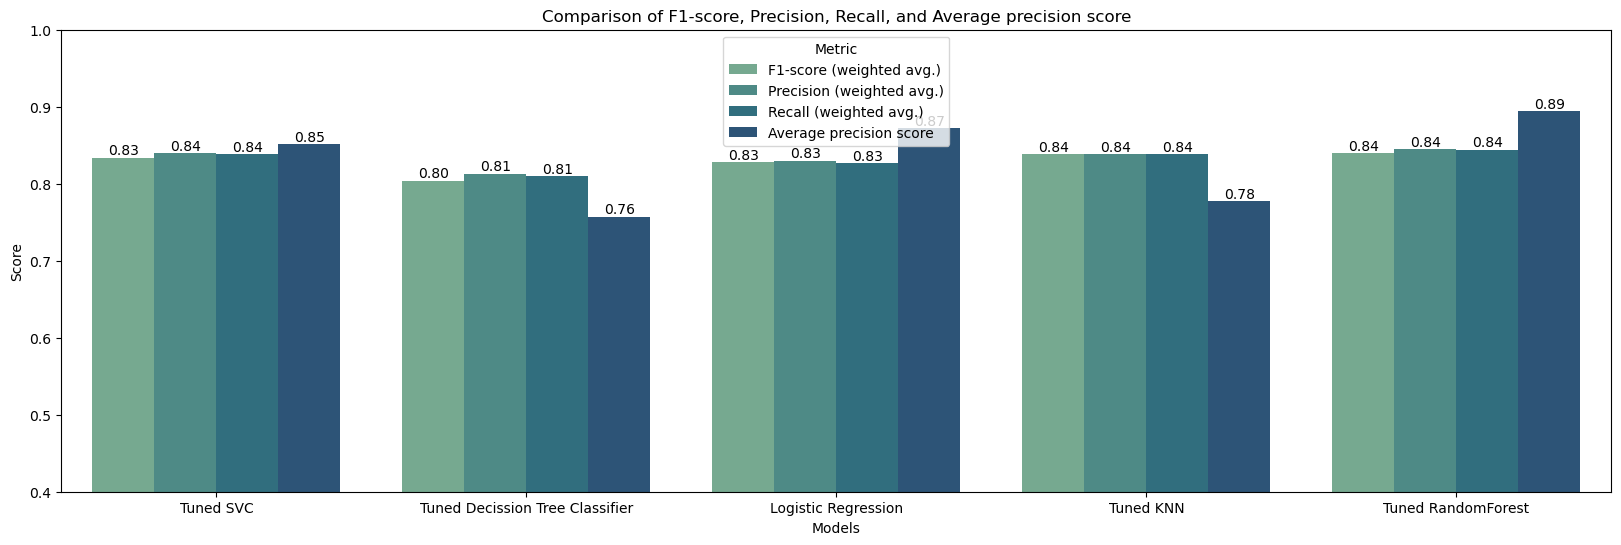

In [166]:
param_grid_rf = dict(n_estimators=[50, 100, 150], min_samples_split=[5, 10, 20], criterion=["gini", "entropy"], max_features=[0.1, 0.2, 0.3],  max_depth=[3, 5, 8, 12])

rf = RandomForestClassifier(random_state=10, n_jobs=-1)

tuned_rf, best_f1 = hyperparameter_tuning(rf, param_grid_rf, X_train, y_train, folds=stratified_kfold)

rf_metrics = show_performance(X_test, y_test, tuned_rf, title='Tuned RandomForest', average='binary')

rf_metrics_train = show_performance(X_train, y_train, tuned_rf, title='Tuned RandomForest', average='binary', show=False)

results.append({
    'Modelo': rf_metrics['model_name'],
    'Hyperparameters Tuned': list(param_grid_rf),
    'Train best F1-score (avg)': rf_metrics_train['model_f1'],
    'Train Precision (avg)': rf_metrics_train['model_prec'],
    'Train Recall (avg)': rf_metrics_train['model_rec'],
    'Test F1-score (avg)': rf_metrics['model_f1'],
    'Test Precision (avg)': rf_metrics['model_prec'],
    'Test Recall (avg)': rf_metrics['model_rec'],
})

compare_metrics([svc_metrics, dt_metrics, lr_metrics, knn_metrics, rf_metrics])

Fitting 10 folds for each of 84 candidates, totalling 840 fits
Mejores hiperparámetros: {'learning_rate': 0.4, 'n_estimators': 30}
-------------------------
>>> Rendiment del model:
- F1-score: 0.836
- Precision: 0.838
- Recall (Sensitivity, TPR): 0.838
- Average precision score: 0.877
-------------------------


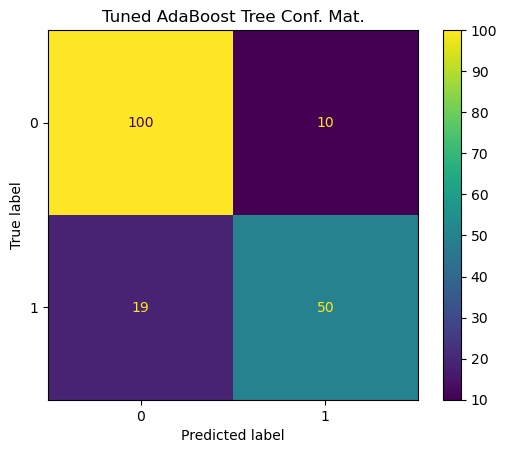

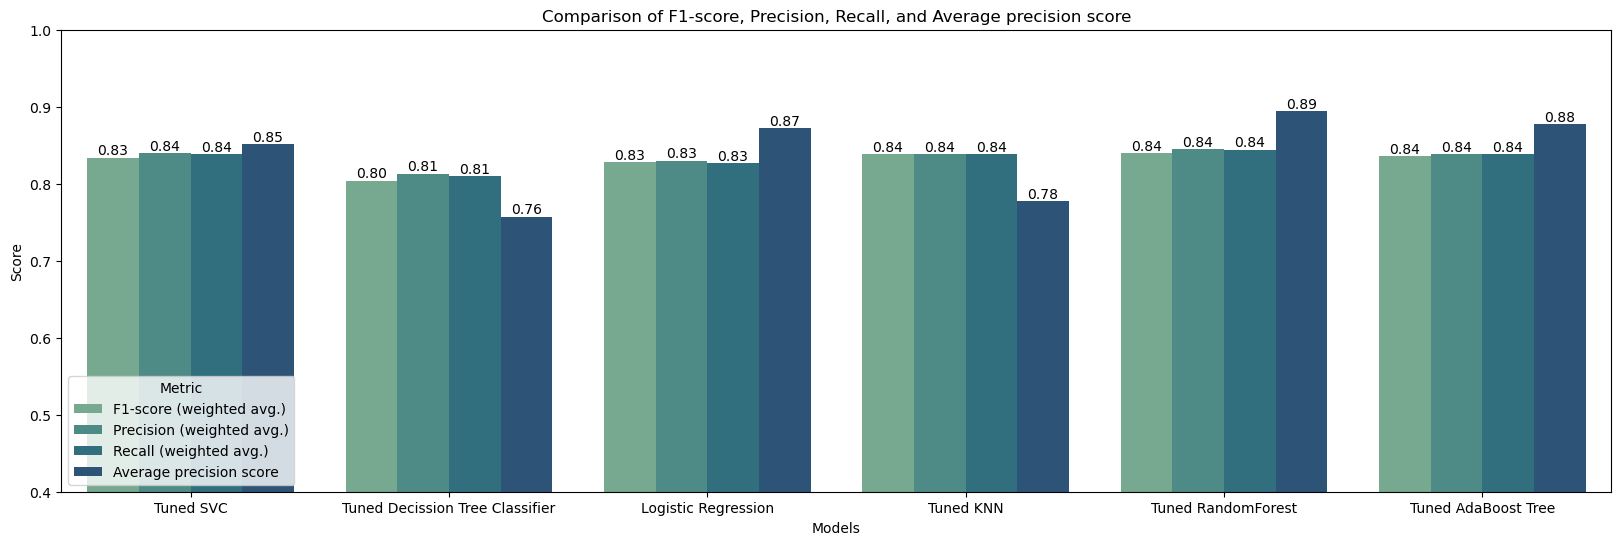

In [167]:

param_grid_abc = dict(n_estimators=list(range(30, 81, 10)), learning_rate=[x * 0.1 for x in range(1, 15)])
abcTree=AdaBoostClassifier(tuned_dt, algorithm='SAMME', random_state=10)#utilitzo el decision tree que millor resultat donaba

tuned_abc_Tree, best_f1 = hyperparameter_tuning(abcTree, param_grid_abc, X_train, y_train, folds=stratified_kfold)
abc_Tree_metrics = show_performance(X_test, y_test, tuned_abc_Tree, title='Tuned AdaBoost Tree', average='binary')

abc_Tree_metrics_train = show_performance(X_train, y_train, tuned_abc_Tree, title='Tuned AdaBoost Tree', average='binary', show=False)

results.append({
    'Modelo': abc_Tree_metrics['model_name'],
    'Hyperparameters Tuned': list(param_grid_abc),
    'Train best F1-score (avg)': abc_Tree_metrics_train['model_f1'],
    'Train Precision (avg)': abc_Tree_metrics_train['model_prec'],
    'Train Recall (avg)': abc_Tree_metrics_train['model_rec'],
    'Test F1-score (avg)': abc_Tree_metrics['model_f1'],
    'Test Precision (avg)': abc_Tree_metrics['model_prec'],
    'Test Recall (avg)': abc_Tree_metrics['model_rec'],
})

compare_metrics([svc_metrics, dt_metrics, lr_metrics, knn_metrics, rf_metrics, abc_Tree_metrics])

### Intentem ajuntar els millors models en un Stack

-------------------------
>>> Rendiment del model:
- F1-score: 0.857
- Precision: 0.864
- Recall (Sensitivity, TPR): 0.86
- Average precision score: 0.895
-------------------------


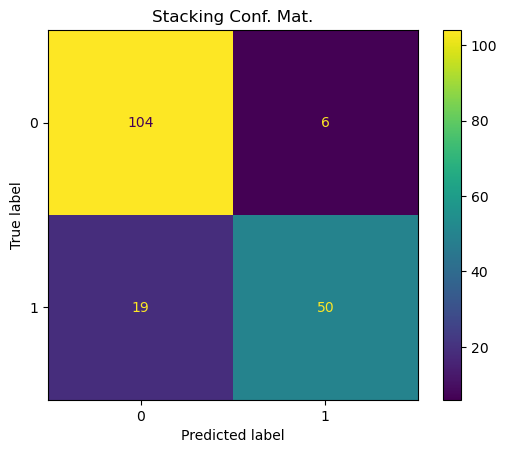

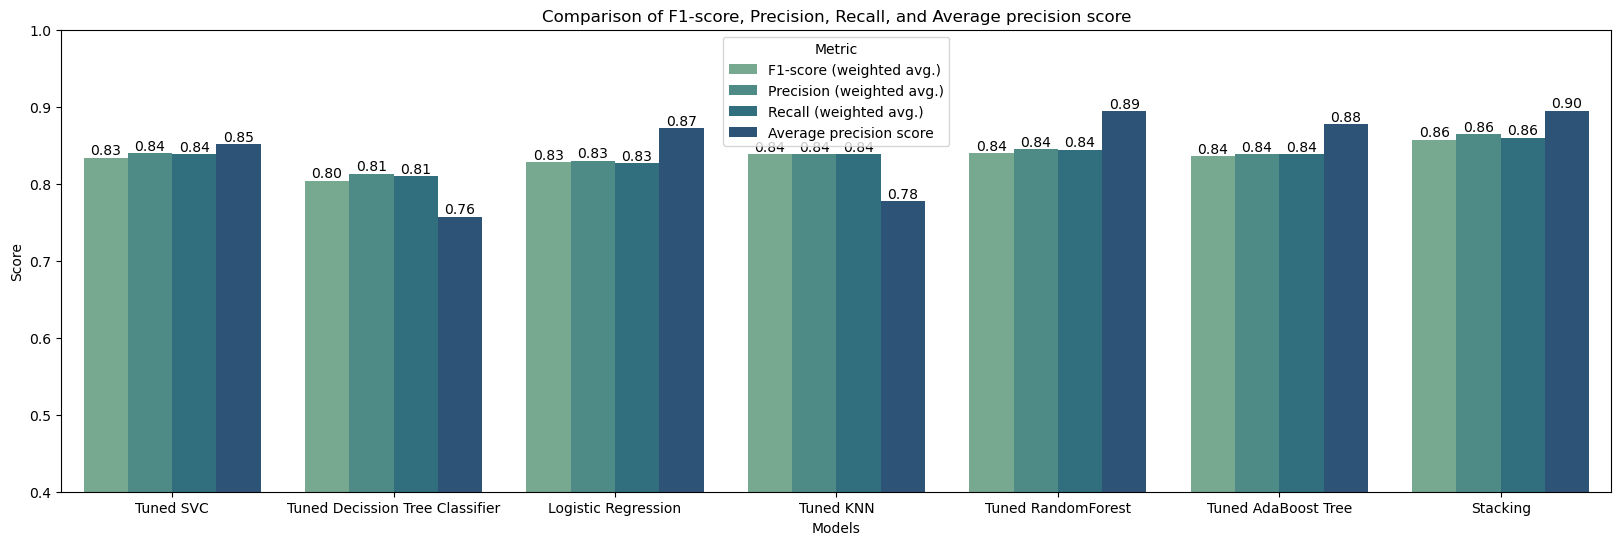

In [168]:
from sklearn.ensemble import StackingClassifier

sc=StackingClassifier(estimators=[("svc", tuned_svc), ("rf", tuned_rf)], cv=stratified_kfold)
sc.fit(X_train, y_train)
sc_metrics = show_performance(X_test, y_test, sc, title='Stacking', average='binary')

compare_metrics([svc_metrics, dt_metrics,  lr_metrics, knn_metrics, rf_metrics, abc_Tree_metrics, sc_metrics])


In [169]:
# No mostrem el stacking per no alterar el nombre de columnes de la taula
results_df = pd.DataFrame(results)
results_df

,Modelo,Hyperparameters Tuned,Train best F1-score (avg),Train Precision (avg),Train Recall (avg),Test F1-score (avg),Test Precision (avg),Test Recall (avg)
0,Tuned SVC,"[kernel, C, decision_function_shape]",0.839,0.841,0.841,0.834,0.840,0.838
1,Tuned Decission Tree Classifier,"[criterion, max_depth, min_samples_split]",0.896,0.905,0.899,0.804,0.813,0.810
2,Logistic Regression,"[penalty, C, class_weight, solver]",0.787,0.789,0.787,0.828,0.830,0.827
3,Tuned KNN,"[n_neighbors, weights, p]",0.883,0.883,0.883,0.838,0.838,0.838
4,Tuned RandomForest,"[n_estimators, min_samples_split, criterion, m...",0.926,0.928,0.927,0.840,0.845,0.844
5,Tuned AdaBoost Tree,"[n_estimators, learning_rate]",0.959,0.959,0.959,0.836,0.838,0.838


### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?

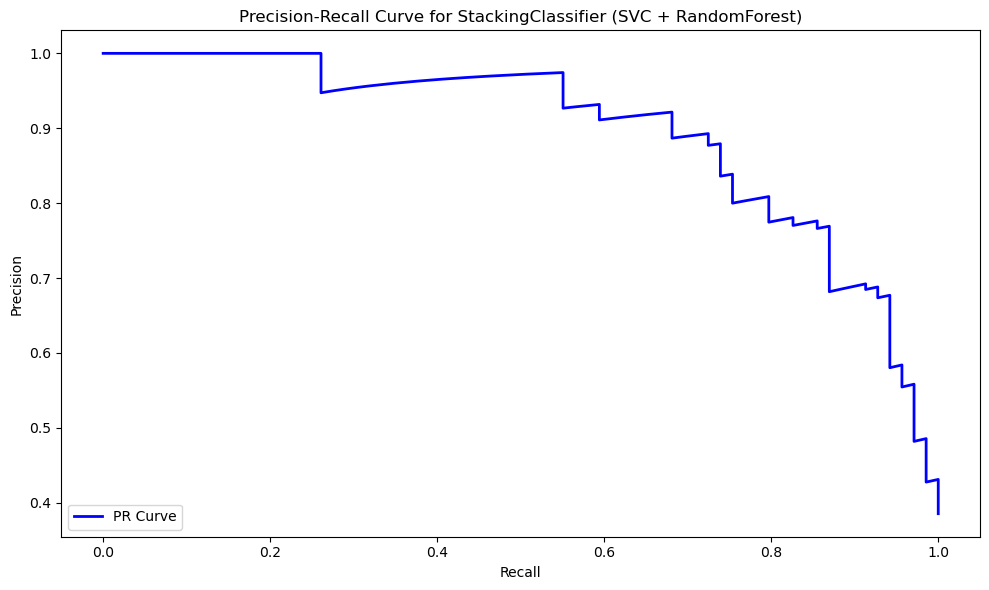

In [170]:
#Per les dades que en tenim pensem que el millor es utilizar la Curva Precissión-Recall ja que les dades no es troben balancejades 
#i la Corba ROC no funciona bé on les dades no es trobjen balancejades.
show_pr_curve(sc, X_test, y_test, "StackingClassifier (SVC + RandomForest)" )

### RESPOSTES APARTAT 5

**Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.**

Per les dades que en tenim pensem que el millor es utilizar la Curva Precissión-Recall ja que les dades no es troben balancejades 
i la Corba ROC no funciona bé on les dades no es trobjen balancejades.
Per qualsevol model augmentar la precissio reduiex el recall,  i viceversa. Per tant el punt de la corba a escollir per utilitzar com a threshold al nostre model dependra de l'ús del model. 
En el nostre cas, ens es important detectar la major cuantitat de posisitius i a més detectar-ho de manera correcta (precission). Per tant buscarem un punt de la corba on els dos parametres siguin prou elevats. Que el punt que marca el f1-score ja ens va bé, ja que es un punt on les dues metriques adquireixen la mateixa importancia.

**Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.**

La mètrica que més ens interesa es el f1-score, que en el nostre cas está ponderada segons el número de morts/vius, d'aquesta manera es més fiable per comparar els models desbalancejats. Veiem que tots els models ens donen unes mètriques similars.

Veiem que hi ha alguns models que fan overfitting encara que continuen sent igual de bons classificant al test. Els models que fan overfitting son els models basats en arbres de decisió (Decision Tree, RandomForest, AdaBoost), això pot ser perque les fulles massa pocs cassos, els cuals poden ser soroll.

Aquest model té un ús  limitat per al tipus de dades que hi ha, ja que avui en dia hi ha pocs vaixells que tinguin les mesures de seguretat que tenia el titanic en aquell moment, ni les dimensions del vaixell. No obstant pot servir per saber quin tipus de persones tenen mes probabilitats de sobreviure en un accident, ja sigui per la seva classe social o per al seu sexe. També aquest dataset podria ser utilitzat per les companyies aseguradores de viatges per saber si tindries mes posibilitats de viure o no i aixi saber si els hi mereix la pena  assegurar-te.

**Com creieu que es podria millorar el vostre model?**

Creiem que el nostre model te diferents punts a millorar, el primer es que podriem intentar balancejar les dades de entrenament desde un principi. Generant dades de la classe minoritaria (en el nostre cas de gent que sobreviu). 
També ens agradaria poder saber com extreure informació de Cabin i de Ticket ja que si dispossesim de mes informació com per exemple que volen dir els numeros o les lletres, per poderles pasar a dades categoriques que estiguessin mes representades ja que en el nostre cas com cada valor no es repetia tenir en compte aquestes varaibles categoriques no tenia sentit. 
Un altre extracció de la informació podria haber vingut per part del nom on com habiem dit abans ja que pel que veiem a mes del nom hi ha una "etiqueta" davant, com per exemple: Miss, Mr, Don, Master que ens estan indicant la categoria social de la persona. 

Per ultim un altre punt posible a millorar seria probar models mes complexes com per exemple un XGBClassifier, un tipus d'ensemble que aprofita els errors dels models per entrenar de nous, semblat al AdaBoost.